## An exploration of daily US birth data suggests that the number of births that occurs on any given day is far from random.  In addition to the variation seen across the months of the year and days of the week, the number of daily births appears to be greatly influenced by holidays and perhaps even supersition. 

### First, import the requisite libraries and other housekeeping tasks.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import calendar
plt.style.use('fivethirtyeight')
%matplotlib inline

### Load the csv file into a pandas dataframe.  Daily US birth data courtesy of [fivethirtyeight](https://github.com/fivethirtyeight/data/blob/master/births/US_births_2000-2014_SSA.csv).


In [2]:
data = pd.read_csv('data/birth_data.csv')
data.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


### The histogram of the number of daily US births has a bimodal distribution.

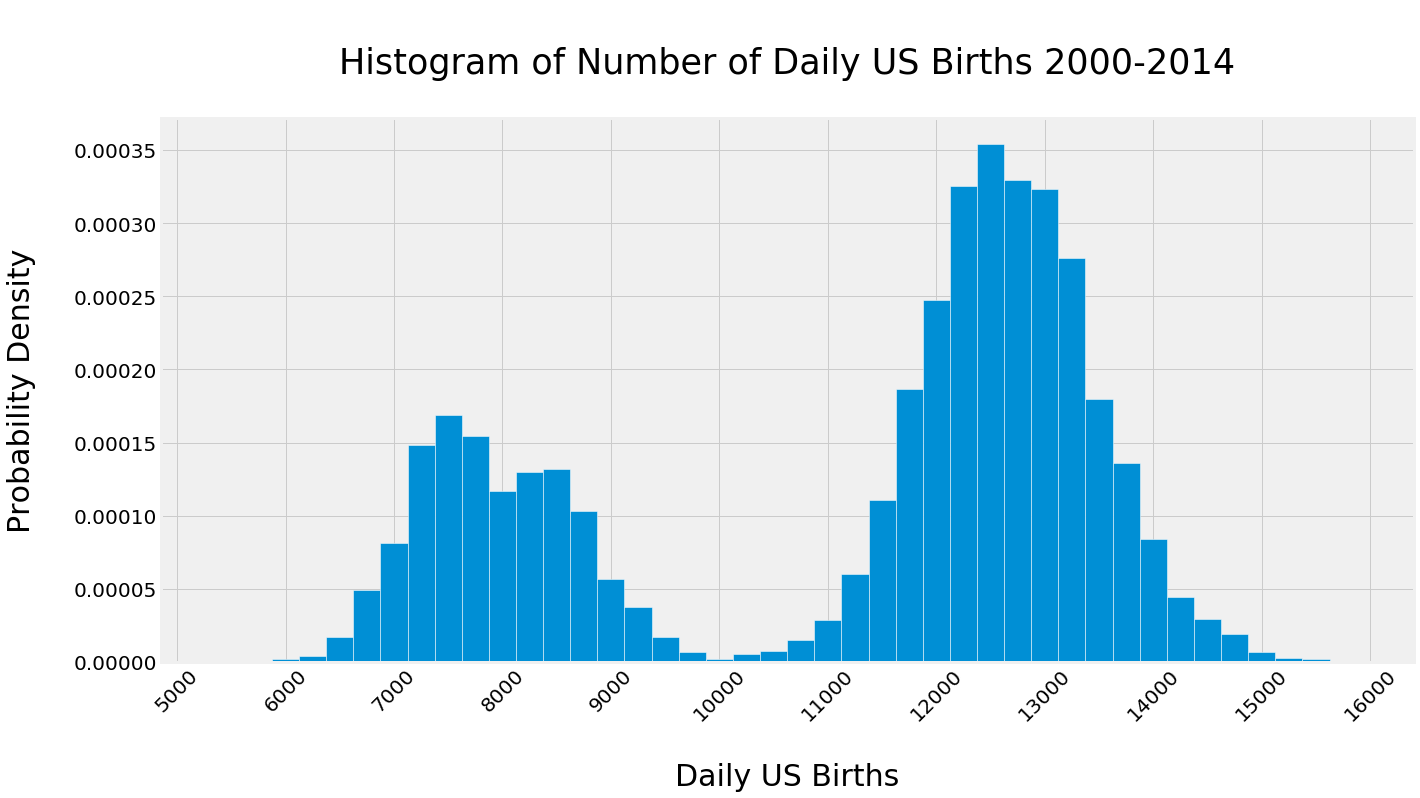

In [3]:
min_births = data.births.min()
max_births = data.births.max()
data.births.hist(
    figsize=(20, 10),
    bins=np.arange(min_births // 500 * 500, max_births, 250),
    align="left",
    density=True,
    ec="w",
)
plt.xticks(np.arange(min_births // 1000 * 1000, max_births, 1000), size=20, rotation=45)
plt.xlabel("\nDaily US Births", size=30)
plt.yticks(size=20)
plt.ylabel("Probability Density\n", size=30)
plt.title("\nHistogram of Number of Daily US Births 2000-2014\n", size=35);


### Group by year and plot the mean number of daily US births.

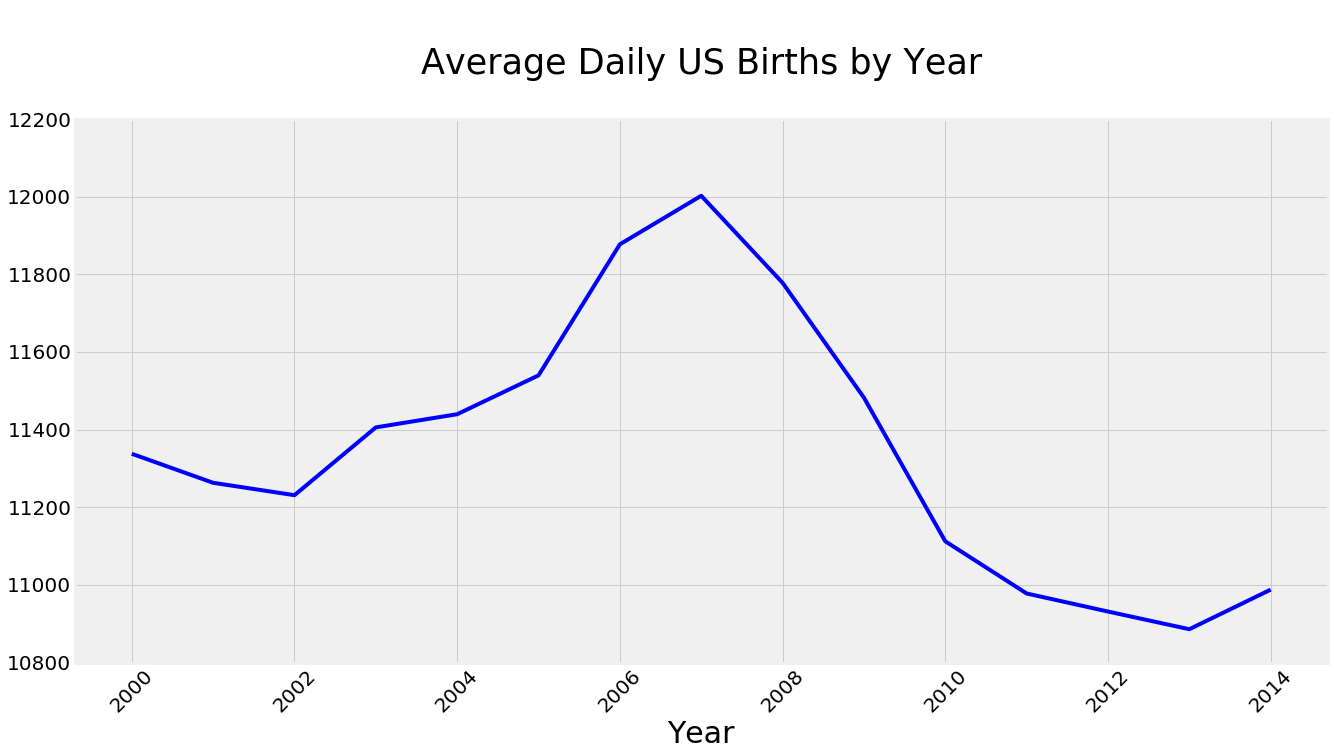

In [4]:
by_year = data.groupby("year").mean().births
by_year.plot(figsize=(20, 10), fontsize=20, color="blue", rot=45, ylim=(10800, 12200))
plt.xlabel("Year", size=30)
plt.title("\nAverage Daily US Births by Year\n", size=35);


### Group by day of the week and plot the mean number of daily US births.

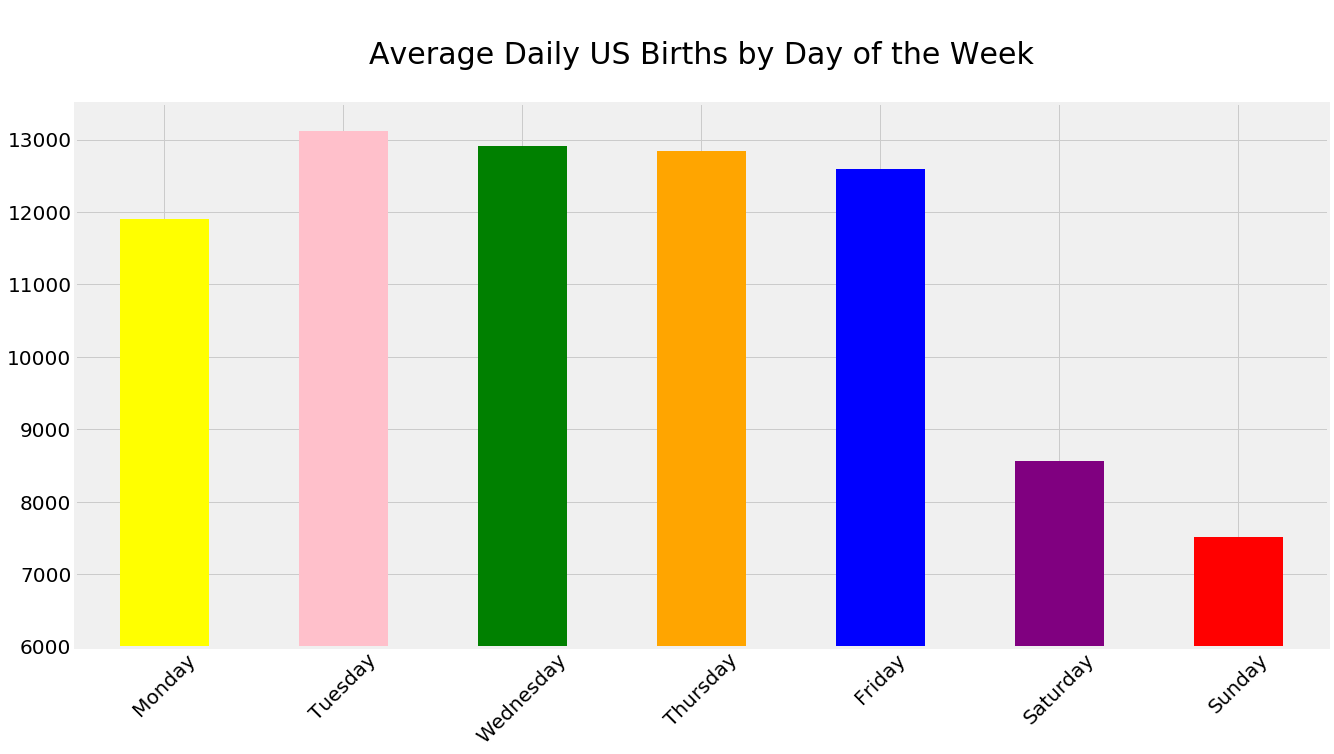

In [5]:
by_day_of_week = data.groupby("day_of_week").mean().births
by_day_of_week.index = calendar.day_name
by_day_of_week.plot(
    figsize=(20, 10),
    fontsize=20,
    kind="bar",
    color=["yellow", "pink", "green", "orange", "blue", "purple", "red"],
    rot=45,
    ylim=(6000, 13500),
)
plt.title("\nAverage Daily US Births by Day of the Week\n", size=30);


### Group by month and plot the mean number of daily US births.

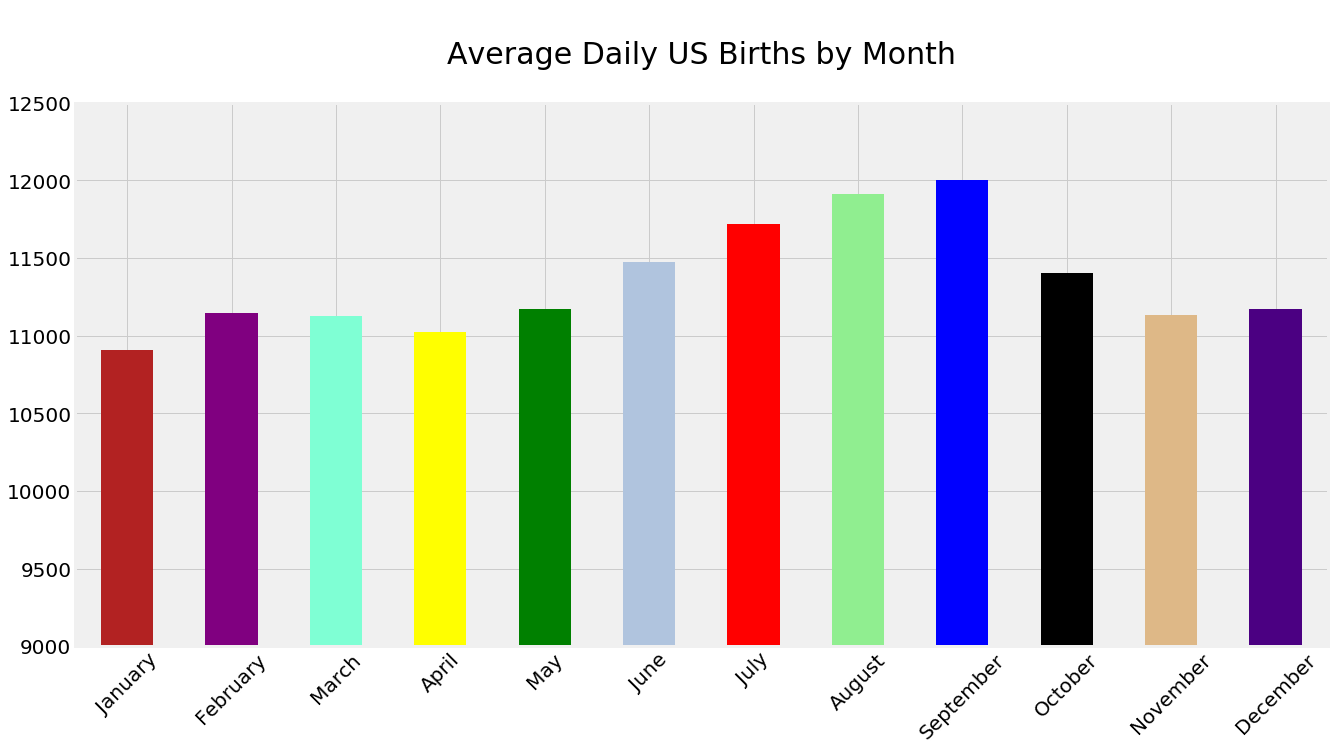

In [6]:
by_month = data.groupby("month").mean().births
by_month.index = calendar.month_name[1:]
by_month.plot(
    kind="bar",
    figsize=(20, 10),
    fontsize=20,
    rot=45,
    color=[
        "firebrick",
        "purple",
        "aquamarine",
        "yellow",
        "green",
        "lightsteelblue",
        "red",
        "lightgreen",
        "blue",
        "black",
        "burlywood",
        "indigo",
    ],
    ylim=(9000, 12500),
)
plt.title("\nAverage Daily US Births by Month\n", size=30);


### Group by month and date of the month and plot the number of mean daily births.  Note the sawtooth pattern due to fluctuations in the number of weekend days that fall on certain days of the month for the years 2000-2014.

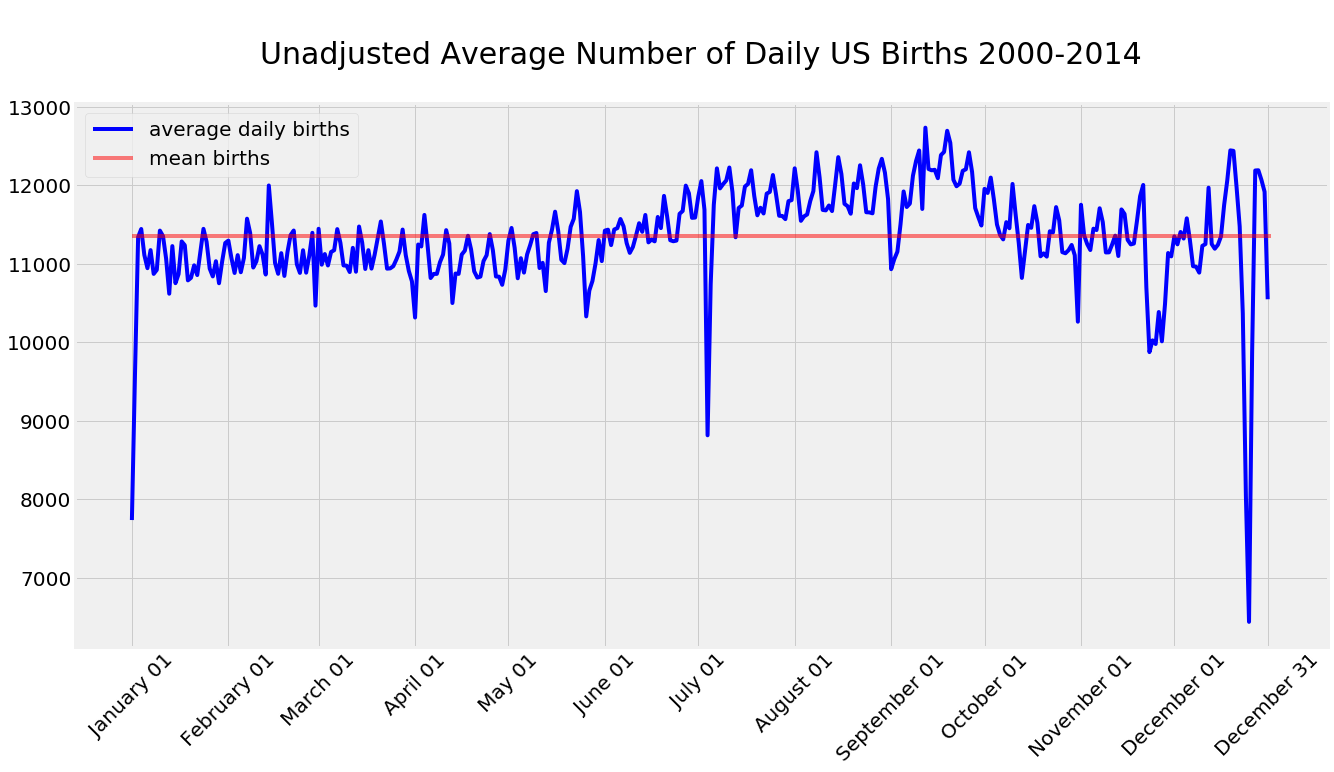

In [7]:
mean = data.births.mean()
by_month_and_date = data.groupby(["month", "date_of_month"]).births.mean()
dates = pd.date_range('1/1/2000', '12/31/2000', freq='MS').append(pd.DatetimeIndex(['12/31/2000']))
by_month_and_date.plot(
    figsize=(20, 10), fontsize=20, rot=45, label="average daily births", color="blue"
)
plt.plot([0, 366], [mean, mean], label="mean births", color="red", alpha=0.5)
plt.xticks(dates.dayofyear - 1, dates.strftime("%B %d"))
plt.xlabel("")
plt.title("\nUnadjusted Average Number of Daily US Births 2000-2014\n", size=30)
plt.legend(fontsize=20);


### Create a dataframe (normed) that contains the daily average number of US births from 2000-2014 by day of the week and month.

In [8]:
normed = data.groupby(["month", "day_of_week"]).births.mean().unstack()
normed.columns = range(1, 8) # in the origial dataframe (data), the day of the week has a value 1-7
normed.columns.name = "day of the week"
normed.index.name = "month"
normed


day of the week,1,2,3,4,5,6,7
month,,,,,,,
1,11322.656716,12384.492537,12266.253731,12398.985075,12291.738462,8332.515152,7314.075758
2,11674.583333,12820.016393,12568.868852,12646.866667,12472.147541,8447.916667,7377.180328
3,11847.666667,12833.600000,12595.287879,12603.611940,12380.298507,8386.602941,7292.893939
4,11753.584615,12814.846154,12566.531250,12556.253968,12120.718750,8194.000000,7205.507692
5,11044.803030,12957.567164,12920.761194,12886.882353,12526.515152,8371.439394,7339.492308
6,12191.312500,13158.031746,13053.000000,13112.609375,12763.369231,8593.369231,7559.584615
7,12285.358209,13562.617647,13269.530303,13358.666667,12886.892308,8889.060606,7809.761194
8,12551.600000,13735.136364,13468.940299,13506.194030,13247.588235,8976.772727,7835.757576
9,11808.430769,13726.406250,13880.476190,13838.562500,13607.812500,9216.015385,8053.461538


### Add the column normed_for_month_and_dow which is births divided by the corresponding average number of daily US births from the normed table (based on month and day of the week).

In [9]:
data["normed_for_month_and_dow"] = data.births / data.apply(
    lambda row: normed.loc[row.month, row.day_of_week], axis=1
)
data.head()


,year,month,date_of_month,day_of_week,births,normed_for_month_and_dow
0,2000,1,1,6,9083,1.090067
1,2000,1,2,7,8006,1.094602
2,2000,1,3,1,11363,1.003563
3,2000,1,4,2,13032,1.052284
4,2000,1,5,3,12558,1.023784


### Create a dictionary of significant dates in a (leap year) calendar year using the pandas.Timestamp function (1 is subtracted from each value to make the day of the year zero based with Jan 1 = 0). 

In [10]:
significant_dates = {
    "New Year's Day": pd.Timestamp("1/1/2000").dayofyear - 1,
    "Valentine's Day": pd.Timestamp("2/14/2000").dayofyear - 1,
    "Feb 29th": pd.Timestamp("2/29/2000").dayofyear - 1,
    "Apr 1st": pd.Timestamp("4/1/2000").dayofyear - 1,
    "Memorial Day": pd.Timestamp("5/26/2000").dayofyear - 1,
    "Jul 4th": pd.Timestamp("7/4/2000").dayofyear - 1,
    "Jul 7th": pd.Timestamp("7/7/2000").dayofyear - 1,
    "Labor Day": pd.Timestamp("9/3/2000").dayofyear - 1,
    "Halloween": pd.Timestamp("10/31/2000").dayofyear - 1,
    "Thanksgiving": pd.Timestamp("11/27/2000").dayofyear - 1,
    "Christmas": pd.Timestamp("12/25/2000").dayofyear - 1
}


### Plot the normed daily US birthrates.  Note the significant drop (and rise) from the mean for particular dates and holidays.

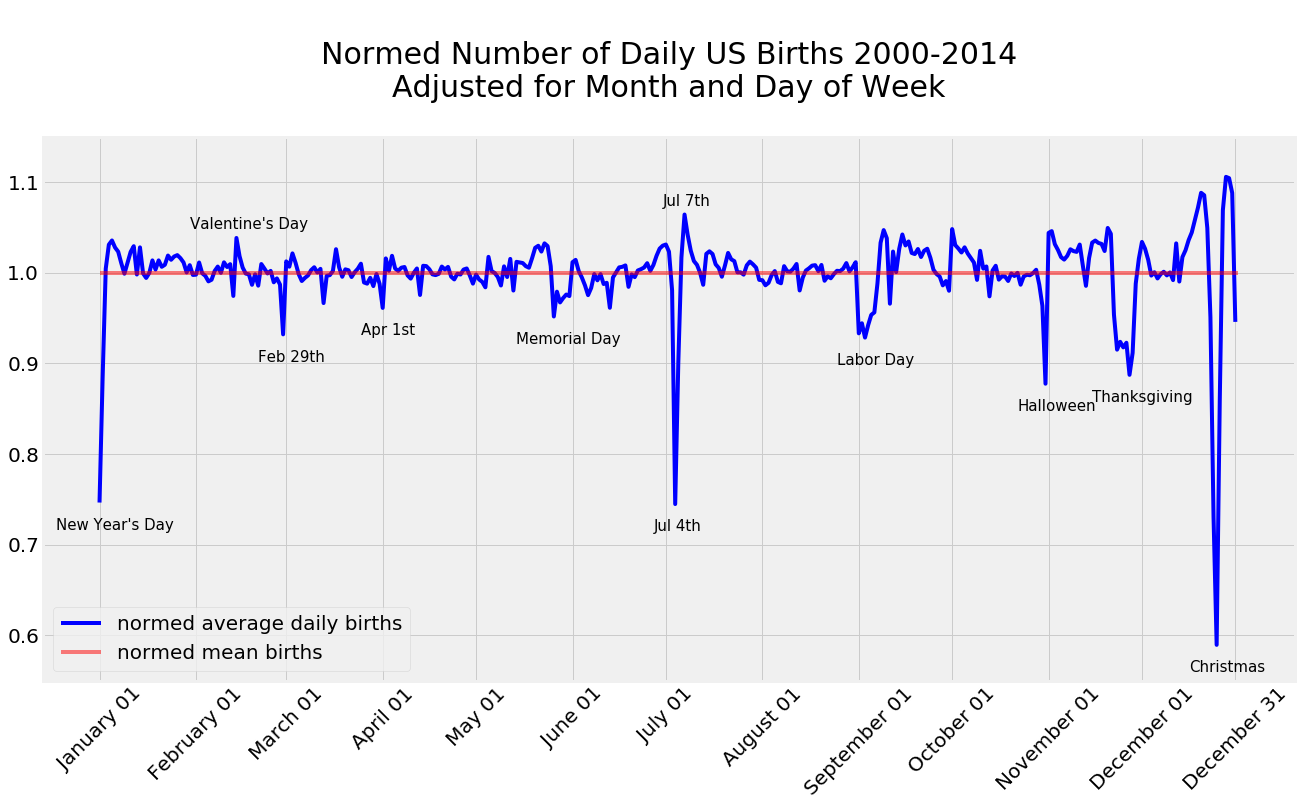

In [11]:
mean = 1
by_month_and_date = data.groupby(
    ["month", "date_of_month"]
).normed_for_month_and_dow.mean()
dates = pd.date_range("1/1/2000", "12/31/2000", freq="MS").append(
    pd.DatetimeIndex(["12/31/2000"])
)
by_month_and_date.plot(
    figsize=(20, 10),
    fontsize=20,
    rot=45,
    label="normed average daily births",
    ylim=(0.55, 1.15),
    color="blue",
)
plt.plot([0, 366], [mean, mean], label="normed mean births", color="red", alpha=0.5)
plt.xticks(dates.dayofyear - 1, dates.strftime("%B %d"))
plt.xlabel("")
plt.title(
    (
        "\nNormed Number of Daily US Births 2000-2014\n"
        "Adjusted for Month and Day of Week\n"
    ),
    size=30,
)
for date in significant_dates:
    x = significant_dates[date] - len(date) #shift the x coordinate of the label
    y = by_month_and_date[significant_dates[date]]
    y += 0.01 if y > 1 else -0.03 #print the label above the point if it is positive
    plt.annotate(
        date,
        xy=(x, y),
        size=15,
    )
plt.legend(fontsize=20, loc="lower left");


### While not specifically called out on the graph above, there appears to by a small cyclical decrease in births that occurs shortly before most months' midpoints.  Let's explore this a bit more.

In [12]:
data_for_the_13th = data[data.date_of_month == 13]
mean_births_13th = int(round(data_for_the_13th.births.mean()))
mean_births = int(round(data.births.mean()))
print(
    f"The number of mean daily US births is {mean_births:,}.  For the 13th "
    f"day of each month,\nthe mean is {mean_births_13th:,}"
)


The number of mean daily US births is 11,350.  For the 13th day of each month,
the mean is 11,111


### This number is lower for Fridays that fall on the 13th than for other Fridays.

In [13]:
friday_13th = data_for_the_13th[data_for_the_13th.day_of_week == 5]
fridays_not_13th = data[(data.day_of_week == 5) & (data.date_of_month != 13)]
mean_births_friday_13th = int(round(friday_13th.births.mean()))
mean_births_friday_not_13th = int(round(fridays_not_13th.births.mean()))
mean_births_friday_13th, mean_births_friday_not_13th
print(
    f"The number of mean daily US births is {mean_births_friday_13th:,} on Fridays "
    f"that fall on the 13th.\nOn Fridays that do not fall on the 13th it is "
    f"{mean_births_friday_not_13th:,}."
)

The number of mean daily US births is 11,950 on Fridays that fall on the 13th.
On Fridays that do not fall on the 13th it is 12,618.


### Plot a histogram of the number of daily US births on Fridays.  Note that the mean number of births that fall on the 13th of the month is less than the mean of all Friday births.

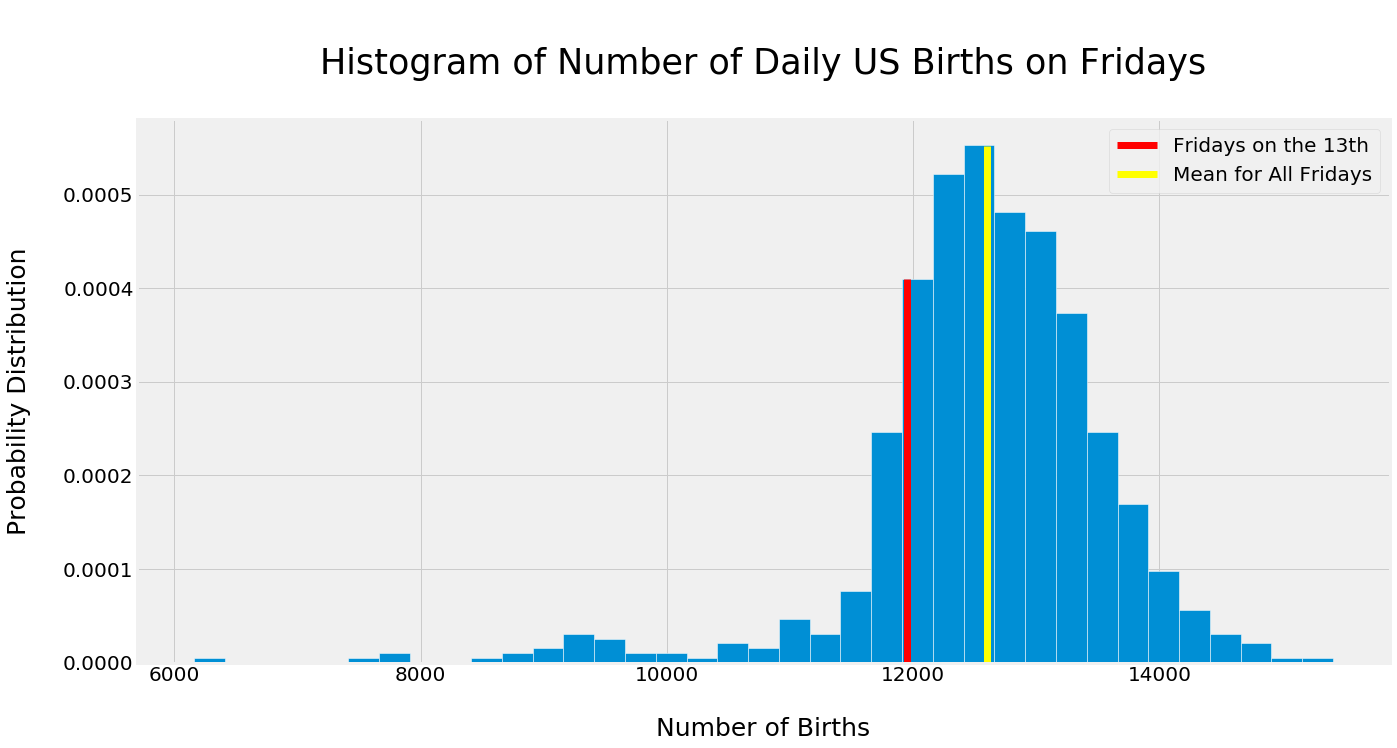

In [14]:
fridays = data[data.day_of_week == 5]
low = fridays.births.min()
high = fridays.births.max()
fridays.births.hist(
    figsize=(20, 10), bins=np.arange(low, high, 250), density=True, ec="w"
)
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot(
    [mean_births_friday_13th, mean_births_friday_13th],
    [0, 0.00041],
    color="red",
    linewidth=7,
    label="Fridays on the 13th",
)
plt.plot(
    [fridays.births.mean(), fridays.births.mean()],
    [0, 0.000552],
    color="yellow",
    linewidth=7,
    label="Mean for All Fridays"
)
plt.legend(fontsize=20)
plt.title("\nHistogram of Number of Daily US Births on Fridays\n", size=35)
plt.xlabel("\nNumber of Births", size=25)
plt.ylabel("Probability Distribution\n", size=25);


In [15]:
percentile_for_13th = np.round(
    stats.percentileofscore(fridays.births, friday_13th.births.mean()), 1
)
print(
    f"The mean number of births on Fridays that fall on the 13th of the month represent the "
    f"{percentile_for_13th}th\npercentile for all Friday births."
)


The mean number of births on Fridays that fall on the 13th of the month represent the 15.7th
percentile for all Friday births.
